# Midterm CS4414/9637/9114

# Student ID: 250901088 <font color = 'red'> (XX / 130) </font>

## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the 5 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You or not allowed to share documents, or communicate in any other way with people inside or outside the classroom during the midterm.** To finish the midterm in the alloted 2 hrs, you will have to work efficiently. **Read the entirety of each question carefully. Note that several questions have coding parts and explanation parts.**

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

**You can submit many times before 4:30pm. I suggest you submit when you have finished, then again after you have checked it over.**

Good luck!

In [1]:
## Preliminaries
# Sets up the environment by importing packages

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

---
## Data set 
The Child Health and Development Studies investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area.

The data frame contains the following data, where each row represents a baby:

- bwt: birth weight (ounces)
- gestation: length of pregnancy (days)
- parity: 0 if mom's first baby, 1 if not mom's first baby
- age: mom's age (years)
- height: mom's height (inches)
- weight: mom's weight (pounds)
- smoke: 0 if mom is nonsmoker, 1 if mom is smoker



In [74]:
# Load data, remove "case" column which is just an ID, 
# also drop rows with any missing data ("NA").
df = pd.read_csv('babies.csv').drop('case',axis='columns').dropna()
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
4,108,282.0,0,23.0,67.0,125.0,1.0
5,136,286.0,0,25.0,62.0,93.0,0.0


---
---
## Task 1: Prediction (XX / 90pt)

This task will focus on building predictive models for birth weight based on the available data.

---
### Question 1.1 - Visualizing the Outcome (X / 5pt)

Produce a plot that visualizes the marginal distribution of birth weight.

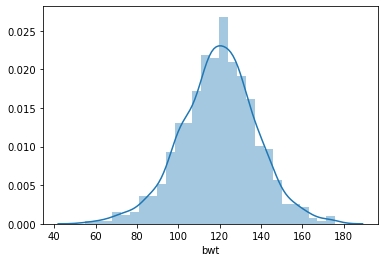

In [75]:
# Q1.1 - Code to produce plot

sns.distplot(df.bwt)


---
### Question 1.2 - Loss Functions (X / 10pt)

Define two loss functions, one that measures the absolute difference between observations and predictions, and one that gives "0" if the absolute difference is less than or equal to a threshold `thresh`, and "1" otherwise. (Essentially, the mean of this loss counts the proportion of predictions that within `thresh` distance of the observations.)

*Return the mean and the standard deviation of the losses.* 

Use the skeleton code below as a guide. For example, if we had

`obs = np.array([1, 2, 3, 4, 5])`  
`pred = np.array([5, 4, 3, 2, 1])`

Then `threshold_loss(obs, pred, 2)` should give `(0.6, 0.54772)`

Recall that to get the sample standard deviation of a Series or array `x`, we can use

`np.std(x, ddof=1)`


In [76]:
# Q1.2 - definitions of loss functions

def abs_diff_loss(obs, pred):
    # Replace 'pass' with your function definition
    x = abs(pred - obs)
    mean_loss = x.mean()
    std_loss = np.std(x, ddof = 1)
    # In your code, assign the mean of the losses to mean_loss, 
    # and assign the standard deviation of the losses to std_loss
    return (mean_loss, std_loss)
    
    
def threshold_loss(obs, pred, thresh):
    # Replace 'pass' with your function definition
    x = abs(pred-obs)
    y=[]
    for i in x :
        if x[i] < thresh or x[i] == thresh :
            y.append(0)
        else :
            y.append(1)
        mean_loss = np.mean(y)
        std_loss = np.std(y, ddof = 1)
    # In your code, assign the mean of the losses to mean_loss, 
    # and assign the standard deviation of the losses to std_loss
    return (mean_loss, std_loss)



---
### Question 1.3 (X / 10pt)

Suppose you are using the absolute loss to measure performance of a model for predicting birth weight using the data we have provided.. If you wanted to set a test set aside for evaluation, how much data should you allocate for testing if you want to evaluate the performance of our predictor to within +/- 4 units of loss with 95% confidence? Provide code that computes the amount of data, and explain in a short paragraph the assumptions you used to compute the sample size. (There are several different approaches that are all acceptable.)

In [118]:
import numpy as np
import scipy.stats as t
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pandas as pd


# Q1.3 - Computation to compute sample size for absolute difference
a = df.size
birth = df.bwt
critval = t.t.ppf(0.975, df)
stderr = np.std(a)/np.sqrt(len(data))
bounds = [np.mean(a) - critval*stderr, np.mean(a) + critval*stderr]
estimated_mean = np.mean(a)

print(estimated_mean)
print(bounds)

# Replace None with your computed test set size
testsetsize_absolute = None
print(f"Test set size for absolute loss: {testsetsize_absolute}")


TypeError: object of type 'Summary' has no len()

#### Q1.3 - Explanation

Although i could not get out the result, I was trying the get the confidence interval in this question adn try to get the sample size which is within +/- 4 units of the loss of the confidence interval.I was going to get the lower bounds and the upper bounds of the confidence interval and was going to use the code to get the +/- 4 units and made it to the sample size.

---
### Question 1.4 (X / 10pt)

Suppose you are using the threshold loss with a cutoff of 4 to measure performance of a model for predicting birth weight using the data we have provided. If you wanted to set a test set aside for evaluation, how much data should you allocate for testing if you want to evaluate the performance of our predictor to within +/- 0.05 of the actual generalization performance with 95% confidence? Provide code that computes the amount of data, and explain in a short paragraph the assumptions you used to compute the sample size. (There are several different approaches that are all acceptable.)

In [113]:
# Q1.4 - Computation to compute sample size for proportion below threshold
threshold_loss(obs, pred, 4)

generalization_error = thershold_loss()

test_ci = generalization_error + 1.96 * np.std(test_errors) / np.sqrt(len(test_errors)) * np.array([-1, 1])


# Replace None with your computed test set size
testsetsize_threshold = None
print(f"Test set size for threshold loss with cutoff of 4: {testsetsize_threshold}")

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/tljh/user/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'thershold_loss' is not defined

#### Q1.4 - Explanation
In this question, I was going to use the 95% confidence interval within +/- 0.05 predictors and my assumptions for the compute the sample size is that there will be a lot of difference in the cutoff since the birthweight can effect a lot of other variables. I was going to use the confidence interval code and compute the sample size.


---
### Question 1.5 - Test Split (X / 5pt)

Set aside some amount of data for testing, and retain the rest for training. Choose whichever amount you want based on your previous answers, and briefly explain which one you used and why you used it.


In [115]:
# Q1.5 - Code to separate into training and testing data
losses = abs(df.bwt - df.bwt.median())

y = df.bwt
X = df.drop('bwt', axis = 'columns')

# Random state assures that folds are consistent across models
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.25, 
                                                random_state = 0)
print(Xtrain.shape,Xtest.shape)

(880, 6) (294, 6)


#### Q1.5 - Explanation

I used absolute difference value of the age and median for the lossess and the test size of 0.25.


---
### Question 1.6 - Simple Linear Model (X / 5pt)

Using Ordinary Least Squares, build a model to predict birth weight as a linear function of the other variables in the data.


In [116]:
# Q1.6 - Code to produce simple OLS model

simplemodel =  ols('bwt ~ gestation + parity + age  + height + weight + smoke',data = df).fit().summary()


---
### Question 1.7 - More Complex Model (X / 10pt)

Again using Ordinary Least Squares, develop second a model that has lower training error than the simple model. Explain how you know that this model has lower training error.

In [117]:
# Q1.7 - Code to produce more complex OLS model
complexmodel = ols('bwt ~ gestation + np.power(gestation,2) + parity + age + height + weight + smoke', data = df).fit().summary()



#### Q1.7 - Explanation

This model has lower training error because as I add terms to a mdoel or make it to the quadratic terms ten the traning error will go down.

## Question 1.8 - Model Selection (X / 20pt)

Use cross-validation to compare the two model spaces to select the one you think will result in the smallest generalization error for one of the loss functions you defined above. (Either one.) Explain why you chose the particular model space. 


In [97]:
# Q1.8 - Code to do cross-validation to compare models
# Edit the code below, replacing "None" with your computations.
model_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

cv_score = cross_val_score(model_pipeline, Xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')

cv_score_mean = -cv_score.mean()

cverror_simple = cv_score_mean




y_quad = df.bwt
X_quad = df.assign(age2 = lambda x: x.age**2).drop('bwt', axis = 'columns')

X_quad_train, X_quad_test, y_quad_train, y_quad_test = train_test_split(X_quad, y_quad, 
                                                                        test_size = 0.25, 
                                                                        random_state = 0)

quadratic_model_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

quad_cv_score = cross_val_score(quadratic_model_pipeline, 
                                X_quad_train, 
                                y_quad_train, 
                                cv = 5, 
                                scoring = 'neg_mean_absolute_error')

quad_cv_score_mean = -quad_cv_score.mean()

cverror_complex = quad_cv_score_mean

print(cverror_simple)
print(cverror_complex)

4.3611322122841445
12.542039041489652


#### Q1.8 - Explanation

I think that the simple error term will be not overfitting neither underfitting because the predictorw will not be very close to the number of observations and this will make us to get a trining error and also the gernerlize it well. 



---
### Question 1.9 - Evaluation, Absolute Value, Normal approximation confidence interval (X / 5pt)

Provide a point estimate for the generalization error of your chosen model using the absolute difference loss. Also provide a 95% confidence interval for the true generalization error under this loss. Construct the interval using a normal approximation.

In [101]:
# Q1.9 Evaluation - Absolute Value Loss - Use normal approximation
# Edit the code below, replacing "None" with your computations.
model_pipeline_intxn = Pipeline([
    ('poly', PolynomialFeatures(include_bias = False)),
    ('linear_regression', LinearRegression())
])


model_pipeline_intxn.fit(Xtrain, ytrain)
ypred = model_pipeline_intxn.predict(Xtest)

est_abs_error = model_pipeline_intxn.predict(Xtest)

test_errors = ytest - ypred

generalization_error = mean_absolute_error(ytest, ypred)

test_ci = generalization_error + 1.96 * np.std(test_errors) / np.sqrt(len(test_errors)) * np.array([-1, 1])

ci_lower_abs_error, ci_upper_abs_error = test_ci[0], test_ci[1]

# ---
### Question 1.10 - Evaluation, Threshold, Bootstrap approximation confidence interval (X / 10pt)

Provide a point estimate for the generalization error of your model using the threshold loss with a threshold of 4. Also provide a 95% confidence interval for the true generalization error under this loss. Construct the interval using the bootstrap.

In [88]:
# Q1.10 Evaluation - Threshold Loss - Use bootstrap
# Edit the code below, replacing "None" with your computations.

def bootstrap(data, model, numboot):
    ### BEGIN SOLUTION
    bootstrapped_rsquared = np.zeros(numboot)
    for i in range(numboot):
        df_bootstrapped = data.sample(data.shape[0], replace = True)
        
        y = df_bootstrapped.wt.values
        yhat = model.predict(df_bootstrapped).values
        bootstrapped_rsquared[i] = 1 - (np.sum(np.power(y - yhat,2)) / np.sum(np.power(y - y.mean(),2)))
    ### END SOLUTION

    return bootstrapped_rsquared


est_thresh_error =  bootstrap(df, threshold(obs,pred,4) , 10_000)



ci_lower_thresh_error, ci_upper_thresh_error = np.quantile(threshold(obs,pred,4), [0.025, 0.975])


---
---
## Task 2 - Inference (XX pt / 40)

---
### Question 2.1 - Association between Smoking and Birth Weight (X / 10pt)

Conduct a statistical analysis that shows whether the data provide substantial evidence that smoking is associated with a difference in average birth weight if we ignore all other variables. First write the necessary code, then explain in a few sentences why the results do or do not indicate an association.

In [63]:
# Q2.1 - Analysis
model2 = ols('smoke ~ bwt + np.power(bwt,2)', data = df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  smoke   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     38.40
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           7.05e-17
Time:                        15:37:38   Log-Likelihood:                -786.20
No. Observations:                1174   AIC:                             1578.
Df Residuals:                    1171   BIC:                             1594.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4975      0.373      4.020      0.000       0.767       2.228
bwt                 -0.0121      0.006     -1.926      0.054      -0.025       0.000
np.power(bwt, 2)  2.355e-05   2.65e-05      0.889      0.374   -2.84e-05    7.55e-05
==============================================================================
Omnibus:                     7024.212   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.885
Skew:                           0.416   Prob(JB):                     6.33e-34
Kurtosis:                       1.440   Cond. No.                     4.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Q2.1 - Explanation
From this question, a statistical model for these competing hypotheses was there is a substantial evidence that smoking is associated with a difference in a birthweight so I used the quadratic effect on a birthweight and the coefficent for bst**2 is positive and the p>0.05 so this is showing that this is not rejecting the hypotheses so it does not matter.


---
### T2 Question 2.2 - Causality between Smoking and Birth Weight (X / 10pt)

Does this analysis prove that smoking causes reduced birth weight? Explain in a few sentences why or why not.

#### Q2.2 - Explanation

No, this does not prove that somking causes reduced brith weight because it didn't reject the null hyphothesis which was smoking is asscoiated with a difference in a birthweight. Also the p-vale was greater than 0.05 so this shows that smoking did ntot cause the birthweight. 


---
### T2 Question 2.3 - Association between Smoking and Birth Weight (X / 10pt)

Conduct a statistical analysis that shows whether the data provide substantial evidence that smoking is associated with a change birth weight if we account for the other measured variables using a linear model. First write the necessary code, then explain in a few sentences why the results do or do not indicate an association.

In [67]:
# Q2.3 - Analysis

model_mark_inter = ols('smoke ~ bwt + np.power(bwt,2) + age ', data = df).fit().summary()

model_mark_inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  smoke   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     27.39
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           4.02e-17
Time:                        15:44:59   Log-Likelihood:                -783.64
No. Observations:                1174   AIC:                             1575.
Df Residuals:                    1170   BIC:                             1596.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7189      0.385      4.470      0.000       0.964       2.473
bwt                 -0.0135      0.006     -2.133      0.033      -0.026      -0.001
np.power(bwt, 2)  2.942e-05   2.66e-05      1.108      0.268   -2.27e-05    8.15e-05
age                 -0.0054      0.002     -2.261      0.024      -0.010      -0.001
==============================================================================
Omnibus:                     7269.881   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.813
Skew:                           0.417   Prob(JB):                     1.78e-33
Kurtosis:                       1.455   Cond. No.                     4.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Q2.3 - Explanation
This still shows that the p value is larger than 0.05 which gives that it will not reject the null hyphothesis. So this shows that the if there is another variable that associate with this case, it will not effect.

---
### T2 Question 2.4 - Causality between Smoking and Birth Weight (X / 10pt)

Does this analysis prove that smoking causes reduced birth weight? Explain in a few sentences why or why not.

#### Q2.4 - Explanation

No, this analysis did not prove that smoking causes reduced birth weight because it did not reject the null hyphothesis which is larger than 0.05 for the pvalue. So this shows that the if there is another variable that associate with this case, it will not effect.

